<a href="https://colab.research.google.com/github/norlac17/Trial-Projects/blob/main/Servo_linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Servo Prediction using Linear Regression

---



-------------

## **Objective**



1.   Predictive Modeling
2.   Feature Analysis:
3.   Model Evaluation:







## **Data Source**

https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv

## **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Import Data**

In [ ]:
df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv")

## **Describe Data**

In [ ]:
df.describe()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [ ]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [ ]:
df.shape

(167, 5)

## **Data Preprocessing**

**Getting counts of categorical values**

In [ ]:
df[['Motor']].value_counts()

,count
Motor,
C,40
A,36
B,36
E,33
D,22


In [ ]:
df[['Screw']].value_counts()

,count
Screw,
A,42
B,35
C,31
D,30
E,29


In [ ]:
df[['Pgain']].value_counts()

,count
Pgain,
4,66
3,50
5,26
6,25


In [ ]:
df[['Vgain']].value_counts()

,count
Vgain,
2,49
1,47
3,27
4,22
5,22


Get encding of categorical features

In [ ]:
df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [ ]:
df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

## **Define Target Variable (y) and Feature Variables (X)**

In [ ]:
y=df['Class']

In [ ]:
y.shape

(167,)

In [ ]:
y

,Class
0,4
1,11
2,6
3,48
4,6
...,...
162,44
163,40
164,25
165,44


In [ ]:
X = df[['Motor','Screw','Pgain','Vgain']]

In [ ]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


## **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2529)

## **Modeling**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr= LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred.shape

(42,)

In [ ]:
y_pred

array([25.56654851, 31.24940687, 19.04876502, 24.47852818, 39.37546387,
       24.37566459, 11.92192754, 19.94086363, 41.22109189, 41.9215261 ,
       13.76755557, 25.9225073 , 17.203137  , 15.50606268, 22.23125126,
       21.48770634, -4.92349976, 31.10343258, 32.9490606 ,  0.46057329,
       34.2402287 , 32.24862639, 34.53901401, 30.10421306, 18.94164411,
        7.03978758, 29.21211445, 16.9500418 , 24.77731349,  4.04896574,
       31.05774247, 23.93090499, 35.93988243, 31.94984108, 11.81480663,
        3.60420614, 22.63290015, 33.09503489, 16.65125649, 38.23027006,
       28.55737035, 21.78649166])

## **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
mean_squared_error(y_test,y_pred)

60.211561593192876

In [ ]:
mean_absolute_error(y_test,y_pred)

6.735955685746795

In [ ]:
r2_score(y_test,y_pred)

0.706476624263817

In [ ]:
lr.coef_

array([ -1.84562802,  -2.99082183, -15.29858459,   5.13523517])

## **Data Visualization**

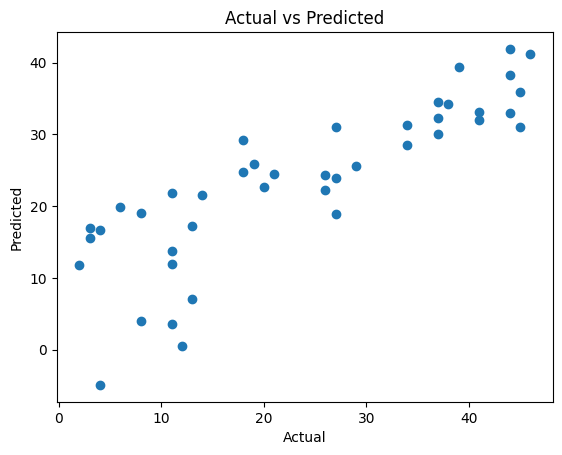

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

## **Prediction**

In [ ]:
X_new = df.sample(1)

In [ ]:
X_new

,Motor,Screw,Pgain,Vgain,Class
71,3,0,4,2,4


In [ ]:
X_new.shape

(1, 5)

In [ ]:
X_new = X_new.drop(['Class'],axis=1)

In [ ]:
X_new

,Motor,Screw,Pgain,Vgain
71,3,0,4,2


In [ ]:
X_new.shape

(1, 4)

In [ ]:
y_pred_new = lr.predict(X_new)

In [ ]:
y_pred_new

array([24.07687928])

In [ ]:
lr.coef_

array([ -1.84562802,  -2.99082183, -15.29858459,   5.13523517])

## **Explaination**

*The prediction made on the new sample demonstrates how to the trained model to classify servo mechanisms based on their features.*